In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk
import pandas as pd

import ruptures as rpt

In [2]:
def read_csv(filepath):
    f = open(filepath)
    data = json.load(f)
    return data

#ecg = read_csv('Preprocessed_data/ecg/ecg_unfiltered.txt')
ecg_filt = read_csv('Preprocessed_data/ecg/ecg_filtered.txt')

In [3]:
#remove first and last few minutes
for patient in ecg_filt:
    ecg_filt[patient] = ecg_filt[patient][5000:700000]
    #ecg[patient] = ecg[patient][5000:763000]

    ecg_filt[patient] = nk.ecg_clean(ecg_filt[patient], sampling_rate=62.475)

In [4]:
duration = int(20*62.4725)
segments_ecg = []

for patient in ecg_filt:
    values = ecg_filt[patient]
    for i in range(0,len(values) - duration + 1, duration):
        segments_ecg.append(values[i : (i + duration)])

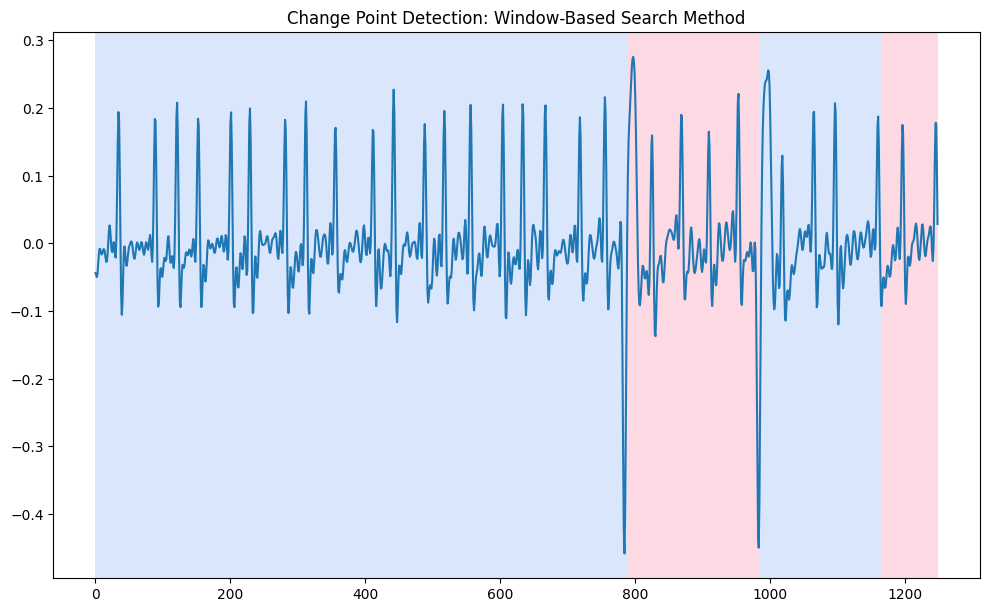

In [5]:
#Changepoint detection with window-based search method
model = "l2"
algo = rpt.Window(width=50, model=model).fit(segments_ecg[10])
my_bkps = algo.predict(n_bkps=3)
rpt.show.display(segments_ecg[10], my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()

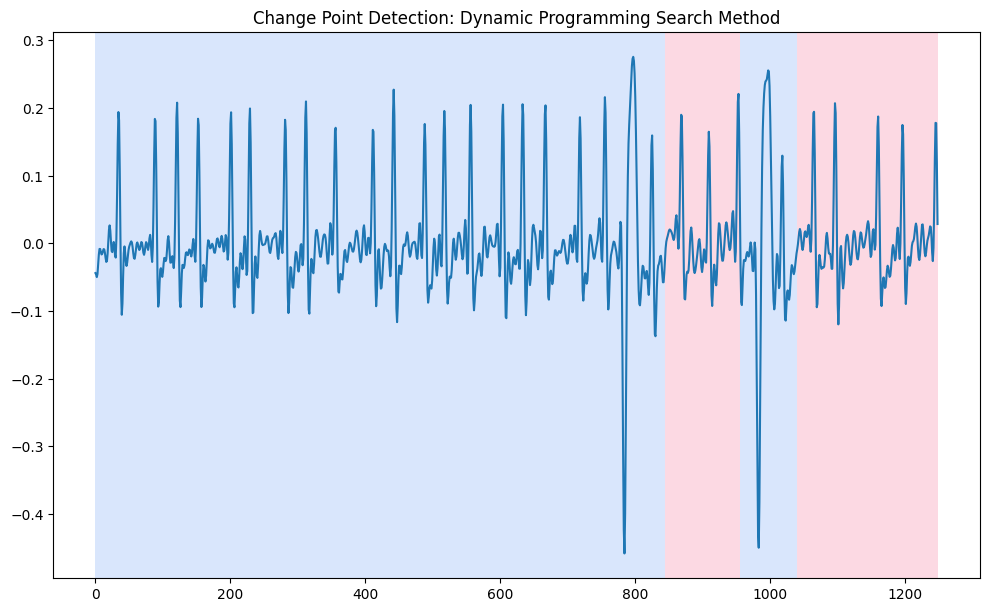

In [29]:
#Changepoint detection with dynamic programming search method
model = "l1"
algo = rpt.Dynp(model=model, min_size=50, jump=5).fit(segments_ecg[10])
my_bkps = algo.predict(n_bkps=3)
rpt.show.display(segments_ecg[10], my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method')
plt.show()